In [18]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [71]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [77]:
path = '/content/gdrive/MyDrive/DataScience/Homeworks/6th/data/data_2d.csv'

# For "*data_2d.csv*" dataset:

###Arrange/clean/set up the DataFrame

In [78]:
data = pd.read_csv(path)
print(data.shape)
data.tail(5)

(199, 3)


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546
198,1.0,3.764228,4.372587


In [79]:
# to rename columns from those numbers (0.0..., -7.68. and 4.6)
new_columns = ['Column1', 'Column2', 'Column3']
data.columns = new_columns
data.head()

,Column1,Column2,Column3
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


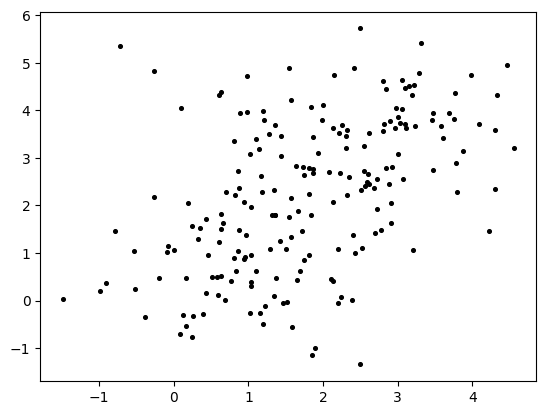

In [80]:
# getting the values and plotting them 
f1 = data['Column1'].values
f2 = data['Column2'].values
f3 = data['Column3'].values

X = np.array(list(zip(f1, f2, f3)))
plt.scatter(f2, f3, c='black', s=7)

### Use **Elbow Method** to find the optimal number of clusters

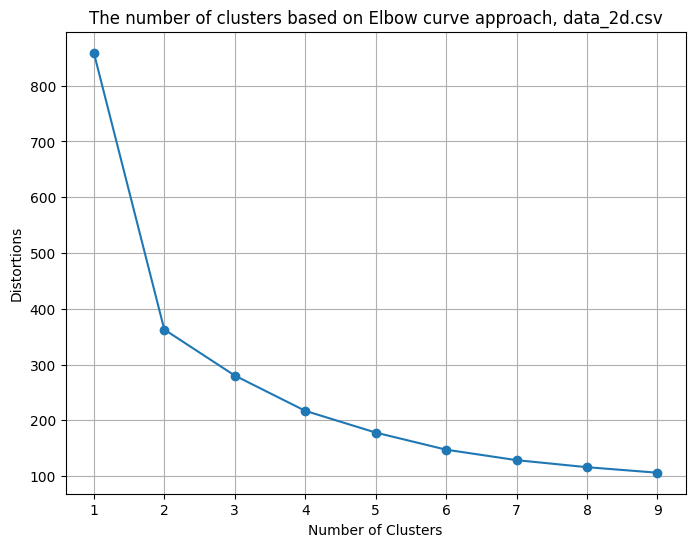

In [82]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

X_data_2d = data.values
distortions = []

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(X_data_2d)
  distortions.append(kmeans.inertia_)

fig = plt.figure(figsize = (8, 6))
plt.plot(range(1,10), distortions, marker='o')
plt.grid(True)
plt.title('The number of clusters based on Elbow curve approach, data_2d.csv')
plt.ylabel('Distortions')
plt.xlabel('Number of Clusters')

plt.show()

###Perform K-Means clustering with optimal K

In [83]:
kmeans = KMeans(init='random', n_clusters=2, n_init=10, random_state=1)
kmeans.fit(X_data_2d)

kmeans.labels_
data['cluster'] = kmeans.labels_
print(data)

     Column1   Column2   Column3  cluster
0        0.0  2.687848  2.366961        0
1        0.0 -0.201379  0.470430        1
2        0.0  0.608496  1.225400        1
3        0.0 -0.082282  1.137218        1
4        0.0  2.083069  2.694482        0
..       ...       ...       ...      ...
194      1.0  0.629144  4.378584        0
195      1.0 -0.723824  5.361801        0
196      1.0  1.346107  2.333476        0
197      1.0  3.608219  3.411546        0
198      1.0  3.764228  4.372587        0

[199 rows x 4 columns]


[[0.91262136 2.47607733 3.50850036]
 [0.0625     1.01572796 0.83816599]]


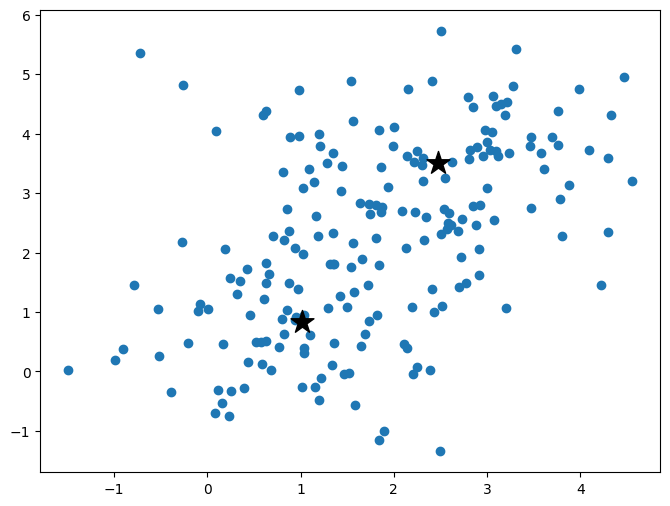

In [84]:
labels = kmeans.predict(X_data_2d)
centroids = kmeans.cluster_centers_
print(centroids)

fig = plt.figure(figsize = (8, 6))

plt.scatter(X_data_2d[:, 1],X_data_2d[:, 2])
plt.scatter(centroids[:, 1], centroids[:, 2], marker='*',  c='black', s=300)
plt.show()

#For "*mnist.csv*" dataset:

In [10]:
path_2 = '/content/drive/MyDrive/DataScience/Homeworks/6th/data/mnist.csv'

In [66]:
data_mnist = pd.read_csv(path_2)
data_mnist.shape

(499, 785)

###Perform K-Means clustering with optimal K

In [13]:
X_mnist = data_mnist.values

In [16]:
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

In [58]:
kmeans_mnist = KMeans(init='random', n_clusters=3, n_init='auto', random_state=42)
kmeans_mnist.fit(X_mnist_pca)

kmeans_mnist.labels_
cluster_cent = kmeans_mnist.cluster_centers_
print(cluster_cent)

[[ 110.28482442  560.36716293]
 [-653.95213504 -177.4253744 ]
 [ 481.05621123 -421.90007703]]


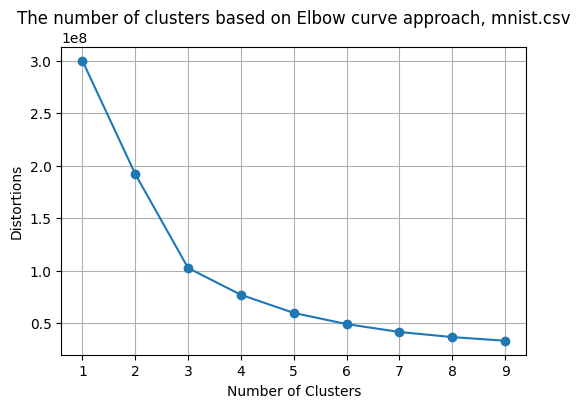

In [67]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(X_mnist_pca)
  distortions.append(kmeans.inertia_)

fig = plt.figure(figsize = (6, 4))
plt.plot(range(1,10), distortions, marker='o')
plt.grid(True)
plt.title('The number of clusters based on Elbow curve approach, mnist.csv')
plt.ylabel('Distortions')
plt.xlabel('Number of Clusters')

plt.show()

####PCA using Scikit-Learn (for 2-D visualization)

In [41]:
# initializing the pca

from sklearn import decomposition
pca = decomposition.PCA()

In [62]:
# to select 2 components for this visuatization
pca.n_components = 2

pca_data = pca.fit_transform(X_mnist_pca)
print('shape of pc_reduced.shape=', pca_data.shape)

shape of pc_reduced.shape= (499, 2)


In [63]:
# The head() method is specific to pandas DataFrames and is not available for numpy arrays.

pca_data[:5]

array([[  -75.85457829, -1043.50196467],
       [ -969.4088682 ,  -344.77073374],
       [ 1054.12236851,  -358.67813564],
       [  420.9425338 ,   671.0870921 ],
       [-1002.83029814,  -302.50093102]])

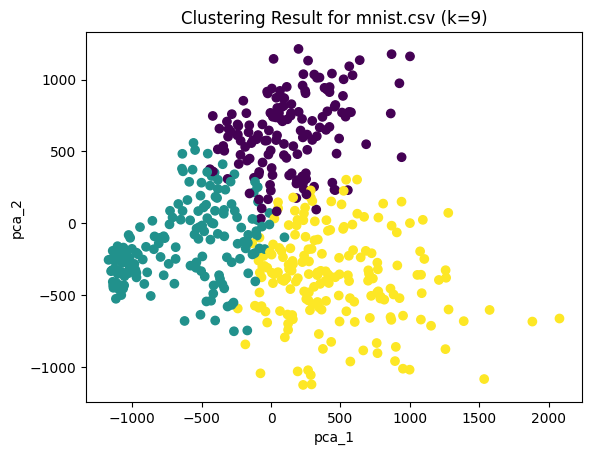

In [68]:
# to visiualize on scatter plot:
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title(f'Clustering Result for mnist.csv (k={k})')
plt.show()

In [69]:
pca.explained_variance_ratio_

array([0.57102484, 0.42897516])

* the first principal component seems to carry more information, 57%, than the second principal component, 42%, as it has a higher explained variance ratio.